In [18]:
import numpy as np
from pyslingshot import Slingshot
import matplotlib.pyplot as plt
import scanpy as sc
from tqdm.autonotebook import tqdm

In [4]:
ctc = sc.read_h5ad('ctc_heterogeneity.h5ad')

In [6]:
ctc.X = ctc.layers["counts"].copy()

In [10]:
sc.pp.normalize_total(ctc, target_sum=1e4)
sc.pp.log1p(ctc)

In [12]:
sc.pp.pca(ctc)

/home/ouyangkang/software/miniconda3/envs/sc/lib/python3.11/site-packages/pyslingshot/util.py:37: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if isint(cluster_labels[0]):
/home/ouyangkang/software/miniconda3/envs/sc/lib/python3.11/site-packages/pyslingshot/util.py:39: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif isstr(cluster_labels[0]):


/home/ouyangkang/software/miniconda3/envs/sc/lib/python3.11/site-packages/pyslingshot/util.py:37: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if isint(cluster_labels[0]):
/home/ouyangkang/software/miniconda3/envs/sc/lib/python3.11/site-packages/pyslingshot/util.py:39: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif isstr(cluster_labels[0]):


Lineages: [Lineage[0, 4, 2, 1], Lineage[0, 4, 3]]


100%|██████████| 1/1 [00:00<00:00,  5.16it/s]


Reversing from leaf to root
Averaging branch @4 with lineages: [0, 1] [<pcurvepy2.pcurve.PrincipalCurve object at 0x7f244753f650>, <pcurvepy2.pcurve.PrincipalCurve object at 0x7f244753c350>]
Shrinking branch @4 with curves: [<pcurvepy2.pcurve.PrincipalCurve object at 0x7f244753f650>, <pcurvepy2.pcurve.PrincipalCurve object at 0x7f244753c350>]


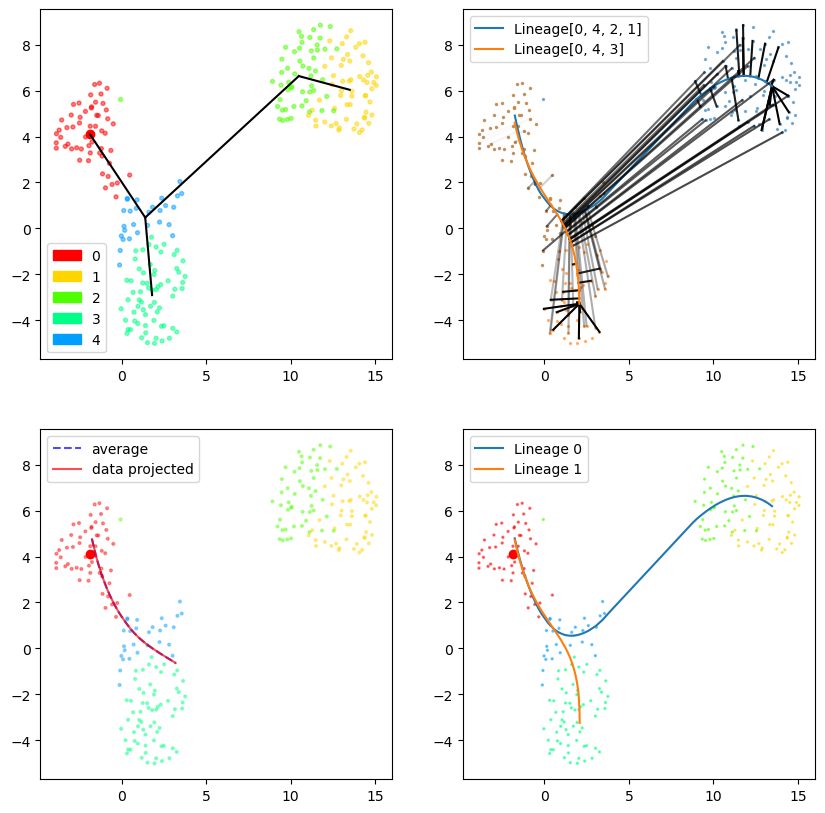

In [24]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
custom_xlim = (-12, 12)
custom_ylim = (-12, 12)


slingshot = Slingshot(ctc, celltype_key="leiden", obsm_key="X_umap", debug_level='verbose')
slingshot.fit(num_epochs=1, debug_axes=axes)

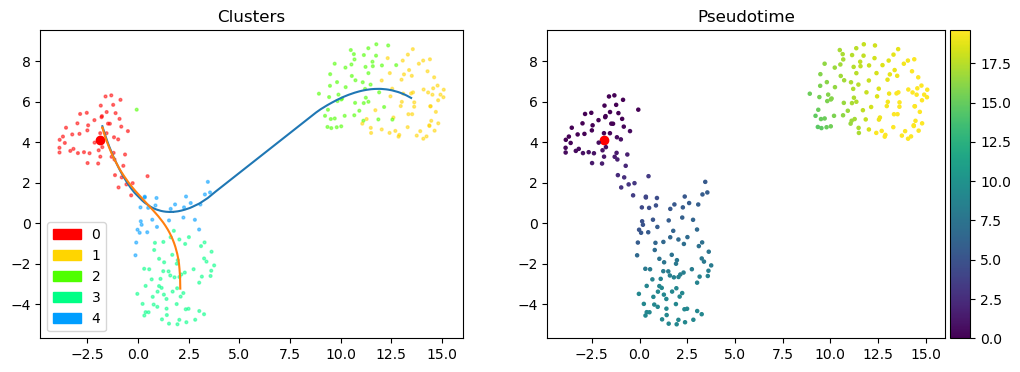

In [25]:
fig, axes = plt.subplots(ncols=2, figsize=(12, 4))
axes[0].set_title('Clusters')
axes[1].set_title('Pseudotime')
slingshot.plotter.curves(axes[0], slingshot.curves)
slingshot.plotter.clusters(axes[0], labels=np.arange(slingshot.num_clusters), s=4, alpha=0.5)
slingshot.plotter.clusters(axes[1], color_mode='pseudotime', s=5)


In [39]:
pseudotime = slingshot.unified_pseudotime